In [525]:
import random
import numpy as np
import simpy
import matplotlib.pyplot as plt
from scipy.stats import *
import seaborn as sns 
import matplotlib as mpl 
import pandas as pd
from importlib import reload
mpl=reload(mpl)
plt=reload(plt)

In [630]:
import matplotlib.patches as mpatches
    
import matplotlib.mlab as mlab 

# M/M/1

In [550]:

NEW_CUSTOMERS = 20  # Total number of customers
INTERVAL_CUSTOMERS = 0.6  # Generate new customers roughly every x seconds
MM1arrivelist=[]
MM1waitlist=[]
MM1servicelist=[]

def source(env, number, interval, counter):
    """Source generates customers randomly"""
    for i in range(number):
        c = customer(env, 'Customer%02d' % (i+1.0), counter, time_in_bank=0.8)
        env.process(c)
        t = random.expovariate( interval)
        yield env.timeout(t)


def customer(env, name, counter, time_in_bank):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    MM1arrivelist.append(arrive)
    #current time env.now
    print('%s arrive at:%7.4f  ' % (name, arrive))
    

    with counter.request() as req:
        # Wait for the counter or abort at the end of our tether
        yield req 
        wait = env.now - arrive
        MM1waitlist.append(wait)

        # We got to the counter
        print(' %s: has to Wait %6.3f' % ( name, wait))

        tib = random.expovariate( time_in_bank)
        MM1servicelist.append(tib)#service time
        yield env.timeout(tib)
        print('%s: Finished at %7.4f' % (name,env.now))


# Setup and start the simulation
# random.seed(RANDOM_SEED)
env = simpy.Environment()

# Start processes and run
counter = simpy.Resource(env, capacity=1 )
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

Customer01 arrive at: 0.0000  
 Customer01: has to Wait  0.000
Customer01: Finished at  0.0317
Customer02 arrive at: 1.7001  
 Customer02: has to Wait  0.000
Customer02: Finished at  2.0158
Customer03 arrive at: 2.2361  
 Customer03: has to Wait  0.000
Customer03: Finished at  3.6476
Customer04 arrive at: 4.4588  
 Customer04: has to Wait  0.000
Customer04: Finished at  4.5725
Customer05 arrive at: 8.1709  
 Customer05: has to Wait  0.000
Customer05: Finished at  8.2088
Customer06 arrive at: 9.0844  
 Customer06: has to Wait  0.000
Customer07 arrive at: 9.4955  
Customer08 arrive at: 9.5404  
Customer09 arrive at: 9.9099  
Customer06: Finished at  9.9642
 Customer07: has to Wait  0.469
Customer07: Finished at 10.9484
 Customer08: has to Wait  1.408
Customer08: Finished at 11.2597
 Customer09: has to Wait  1.350
Customer10 arrive at:11.6590  
Customer09: Finished at 12.3720
 Customer10: has to Wait  0.713
Customer10: Finished at 12.3801
Customer11 arrive at:14.4219  
 Customer11: has to

In [551]:
MM1timelengthcus=[]
MM1customertotaltimelist=[]
for i in range(len(MM1arrivelist)):
    MM1totaltime=MM1arrivelist[i]+MM1waitlist[i]+MM1servicelist[i]
    MM1totaltimeper=MM1waitlist[i]+MM1servicelist[i]
    MM1customertotaltimelist.append(MM1totaltime)
    MM1timelengthcus.append(MM1totaltimeper)
    

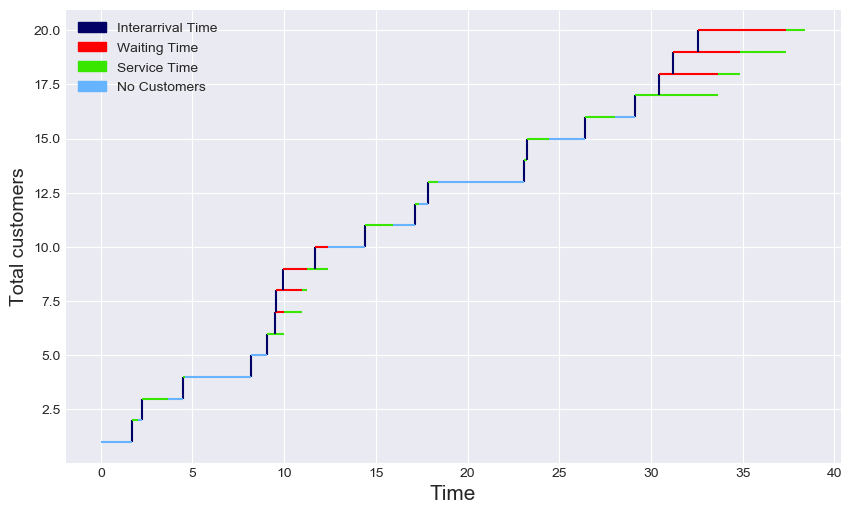

In [604]:
plt.style.use('seaborn-darkgrid')
sns.set_palette("hls") 
mpl.rc("figure", figsize=(10,6)) 
h=len(MM1arrivelist)

for i in range(h):
    plt.hlines(y=i+1,xmin=MM1arrivelist[i]+MM1waitlist[i],xmax=MM1customertotaltimelist[i],colors='#39e600')
    plt.hlines(y=i+1,xmin=MM1arrivelist[i],xmax=MM1arrivelist[i]+MM1waitlist[i],colors='#ff0000')
#     plt.vlines(x=customertotaltimelist[i],ymin=0,ymax=i+1)
    if i <=(h-2):
        plt.vlines(x=MM1arrivelist[i+1],ymin=i+1,ymax=i+2,colors='#000066',)
        if MM1customertotaltimelist[i]<MM1arrivelist[i+1] :
            plt.hlines(y=i+1,xmin=MM1customertotaltimelist[i],xmax=MM1arrivelist[i+1],colors='#66b3ff')

            plt.xlabel('Time',size=15)
            
plt.ylabel('Total customers',size=14)

first_patch = mpatches.Patch(color='#000066', label='Interarrival Time')
second_patch = mpatches.Patch(color='#66b3ff', label='No Customers')
third_patch = mpatches.Patch(color='#ff0000', label='Waiting Time')
fourth_patch = mpatches.Patch(color='#39e600', label='Service Time')

plt.legend(handles=[first_patch,third_patch,fourth_patch,second_patch],loc=2)

plt.savefig('MM1cus.jpg',dpi=600,bbox_inches = 'tight')
plt.show()

# M/M/n

In [87]:

def n_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS,SIM_TIME,SERVER):
        
    MMNarrivelist=[]
    MMNwaitlist=[]
    MMNservicelist=[]

    def source(env, number, interval, counter):
        """Source generates customers randomly"""
        for i in range(number):
            c = customer(env, 'Customer%02d' % i, counter,8)
            env.process(c)
#             intervariate(1/)
            t = np.random.exponential(interval)
            yield env.timeout(t)


    def customer(env, name, counter, time_in_bank):
        """Customer arrives, is served and leaves."""
        
        arrive = env.now
        MMNarrivelist.append(arrive)
        
        with counter.request() as req:

            yield req 
            wait = env.now - arrive
            MMNwaitlist.append(wait)

            tib = np.random.exponential( time_in_bank)

            yield env.timeout(tib)
            MMNservicelist.append(tib)

    # Setup and start the simulation
    env = simpy.Environment()

    # Start processes and run
    counter = simpy.Resource(env, capacity=SERVER)
    env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
    env.run(until=SIM_TIME)
    
    return(MMNwaitlist,MMNservicelist,MMNarrivelist)


Ideal: (0.8, 0.1, 0.125)
0.7957136144714507 0.09552872437854269 0.12005415345569678


# Effect of number of total customers on waiting time

In [476]:
INTERVAL_CUSTOMERS = 10/4  # Generate new customers roughly every x seconds
SIM_TIME = 1000000

customers_range1 = [100,1000,10000,20000]

simuationlist111=500

cc=[]
for j in customers_range1:
    customer1=[]
    for i in range(simuationlist111):
        MM_waitlist,MM_servicelist,MM_arrivelist = n_queuing(j,INTERVAL_CUSTOMERS,SIM_TIME,4)
        customer1.append(np.mean(MM_waitlist))
    cc.append(customer1)
    


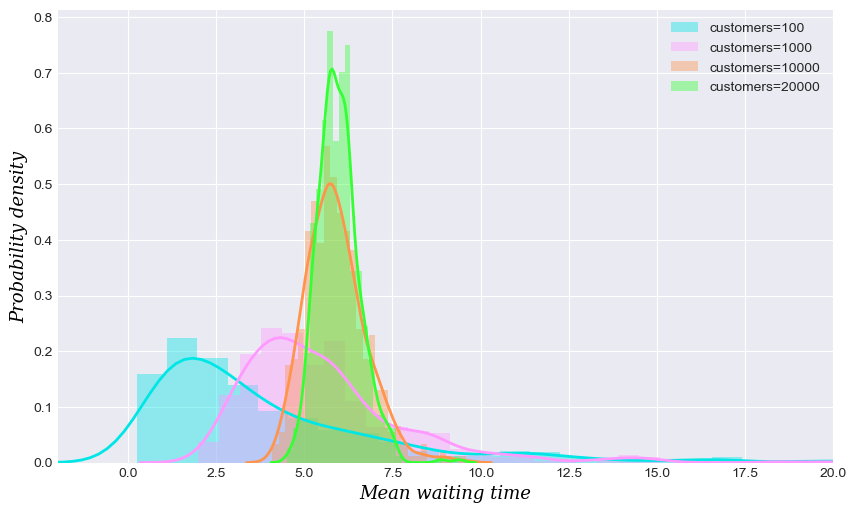

In [657]:
plt.style.use('seaborn-darkgrid')
sns.set_palette("hls") 
mpl.rc("figure", figsize=(10,6)) 

sns.distplot(cc[0],bins=30,kde_kws={"color":"#00e6e6", "lw":2}, hist_kws={ "color": "#00e6e6" },label='customers=100') 
sns.distplot(cc[1],bins=30,kde_kws={"color":"#ff99ff", "lw":2}, hist_kws={ "color": "#ff99ff" },label='customers=1000') 
sns.distplot(cc[2],bins=30,kde_kws={"color":"#ff944d", "lw":2}, hist_kws={ "color": "#ff944d" },label='customers=10000')
sns.distplot(cc[3],bins=30,kde_kws={"color":"#33ff33", "lw":2}, hist_kws={ "color": "#33ff33" },label='customers=20000')
plt.xlabel('Mean waiting time',font)
plt.ylabel('Probability density',font)
plt.xlim(-2,20)
plt.legend()
plt.savefig('meanwaitingdistru.jpg',bbox_inches = 'tight')
plt.show()
# plt.hist(cc[0])
# plt.hist(cc[1])
# plt.hist(cc[2])

In [245]:
intervals=np.array([ 8.  ,  8.15,  8.3 ,  8.45,  8.6 ,  8.75,  8.9 ,  9.05,  9.2 ,
        9.35,  9.5 ,  9.65,  9.8 ,  9.95, 10.1 , 10.25, 10.4 , 10.55,
       10.7 , 10.85, 11.  , 11.15, 11.3 , 11.45, 11.6 , 11.75, 11.9 ,12, 22, 32, 42, 52, 62, 72])

# MMN Effect of $\rho$ and the average waiting time

In [368]:
servers = [1,2,4]
NEW_CUSTOMERS = 10000
SIM_TIME = 1000000

ntot = []
nstdtot = []

nrhotot = []
nrhostdtot = []

simulations = 100
ttotaltest=[]
# Arrival rate

# Loop over servers (1,2,4)
for totservers in servers:
    n = []
    nstdn = []
    
    nrho = []
    nstdnrho = []
    # Loop over the arrival rate
    for interval in intervals:
        nrhoint = []
        nint = []
        nstdnint = []
        ttest=[]
        # Calculate for multiple simulations
        for sim in range(simulations):
            nwaitlist,nservicelist,narrivelist = n_queuing(NEW_CUSTOMERS,interval / totservers,SIM_TIME,totservers)
            
            # Save the average waiting time and the work load, rho
            nint.append(np.mean(nwaitlist))
            nrhoint.append((1 / (narrivelist[-1] / NEW_CUSTOMERS)) / (totservers / np.mean(nservicelist)))
           
        ttest.append(nint)    
        n.append(np.mean(nint))
        nstdn.append(np.std(nint))
        nrho.append(np.mean(nrhoint))
#         stdnrho.append(np.std(nrhoint))
    ttotaltest.append(ttest)    
    ntot.append((n))
    nstdtot.append(nstdn)
    
    nrhotot.append((nrho))
#     nrhostdtot.append(stdnrho)


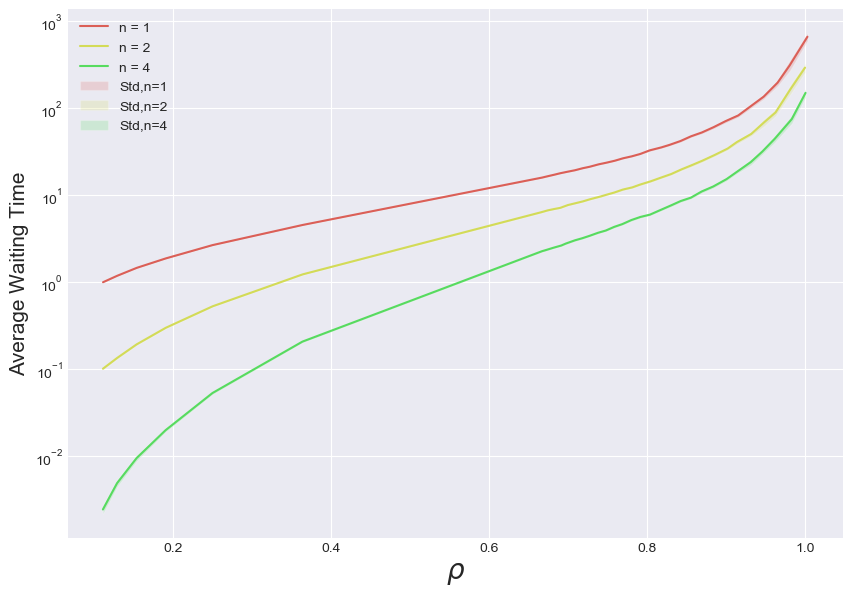

In [753]:
nfill1 = []
nfill2 = []
# Find the minimum and maximum values of the mean waiting time (to show error bar)
for j in range(len(servers)):
    h1list=[]
    h2list=[]

    for i in range(len(ntot[0])):
        h1list.append(ntot[j][i] + (1.96*nstdtot[j][i])/10)
        h2list.append(ntot[j][i] - (1.96*nstdtot[j][i])/10)
    nfill1.append(h1list)
    nfill2.append(h2list)

# Plot the average waiting time as a function of the work load, rho

for i in range(len(servers)):
    plt.plot(nrhotot[i],ntot[i],label='n = ' + str(servers[i]))
    plt.fill_between(nrhotot[i],nfill1[i],nfill2[i], alpha=0.2, edgecolor="white",label='Std,n='+ str(servers[i]))
    
plt.xlabel(r'$\rho$',size = 20)
plt.ylabel('Average Waiting Time',size = 15)
plt.yscale("log")
plt.legend()
plt.show()

# M/M/n with Priority

In [192]:
def prio_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS,SIM_TIME,SERVER):
    
    MMN_prio_arrivelist=[]
    MMN_prio_waitlist=[]
    MMN_prio_servicelist=[]

    def source(env, number, interval, counter):
        """Source generates customers randomly"""
        for i in range(number):
            c = customer(env, 'Customer%02d' % i, counter,8.0)
            env.process(c)
            t = np.random.exponential(interval)
            yield env.timeout(t)


    def customer(env, name, counter, time_in_bank):
        """Customer arrives, is served and leaves."""
        
        arrive = env.now
        MMN_prio_arrivelist.append(arrive)
        tib = np.random.exponential(time_in_bank)
        
        with counter.request(priority = tib) as req:

            yield req 
            wait = env.now - arrive
            MMN_prio_waitlist.append(wait)

            yield env.timeout(tib)
            MMN_prio_servicelist.append(tib)

    # Setup and start the simulation
    random.seed(RANDOM_SEED)
    env = simpy.Environment()

    # Start processes and run
    counter = simpy.PriorityResource(env, capacity=SERVER)
    env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
    env.run(until=SIM_TIME)
    
    return(MMN_prio_waitlist,MMN_prio_servicelist,MMN_prio_arrivelist)
    


# MMN with priority  Effect of $\rho$ and the average waiting time

In [193]:
servers = [1,2,4]
NEW_CUSTOMERS = 10000
SIM_TIME = 1000000

pntot = []
pnstdtot = []

pnrhotot = []
pnrhostdtot = []

simulations = 100

# Arrival rate

# Loop over servers (1,2,4)
for totservers in servers:
    pn = []
    pstdn = []
    
    pnrho = []
    pstdnrho = []
    
    # Loop over the arrival rate
    for interval in intervals:
        pnrhoint = []
        pnint = []
        pstdnint = []
        
        # Calculate for multiple simulations
        for sim in range(simulations):
            pnwaitlist,pnservicelist,pnarrivelist = prio_queuing(NEW_CUSTOMERS,interval / totservers,SIM_TIME,totservers)
            
            # Save the average waiting time and the work load, rho
            pnint.append(np.mean(pnwaitlist))
            pnrhoint.append((1 / (pnarrivelist[-1] / NEW_CUSTOMERS)) / (totservers / np.mean(pnservicelist)))
           
            
        pn.append(np.mean(pnint))
        pstdn.append(np.std(pnint))
        pnrho.append(np.mean(pnrhoint))
#         stdnrho.append(np.std(nrhoint))
        
    pntot.append((pn))
    pnstdtot.append(pstdn)
    
    pnrhotot.append((pnrho))
#     nrhostdtot.append(stdnrho)


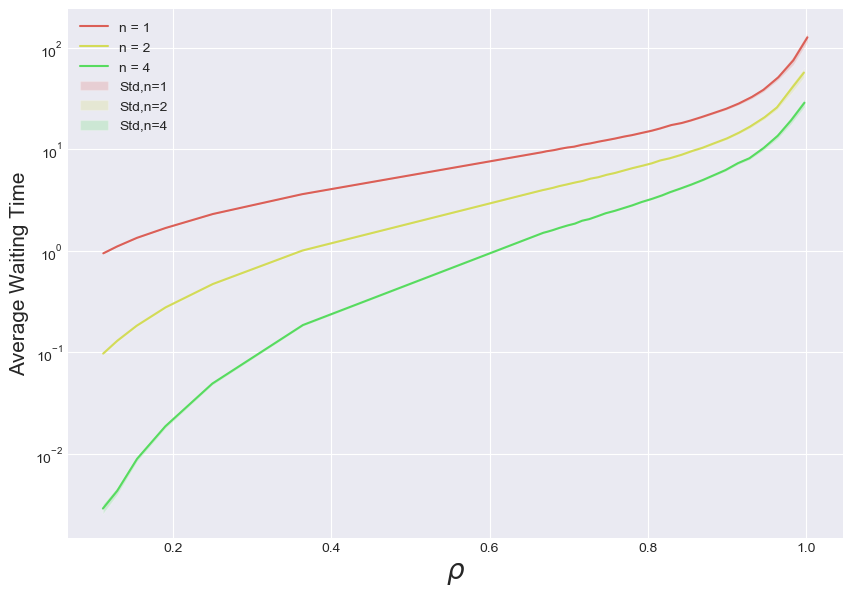

In [754]:
pfill1 = []
pfill2 = []

# Find the minimum and maximum values of the mean waiting time (to show error bar)
for j in range(len(servers)):
    ph1list=[]
    ph2list=[]
    for i in range(len(pntot[0])):
        ph1list.append(pntot[j][i] + 1.96*pnstdtot[j][i]/10)
        ph2list.append(pntot[j][i] - 1.96*pnstdtot[j][i]/10)
    pfill1.append(ph1list)
    pfill2.append(ph2list)


# Plot the average waiting time as a function of the work load, rho
for i in range(len(servers)):
    plt.plot(pnrhotot[i],pntot[i],label='n = ' + str(servers[i]))
    plt.fill_between(pnrhotot[i],pfill1[i],pfill2[i], alpha=0.2, edgecolor="white",label='Std,n='+ str(servers[i]))
    
plt.xlabel(r'$\rho$',size = 20)
plt.ylabel('Average Waiting Time',size = 15)
plt.yscale("log")
plt.legend()
plt.show()

# Deterministic

In [121]:
def det_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS,SIM_TIME,SERVER):
    """ Deterministic service time"""
    
    MDarrivelist=[]
    MDwaitlist=[]
    MDservicelist=[]

    def source(env, number, interval, counter):
        """Source generates customers randomly"""
        for i in range(number):
            c = customer(env, 'Customer%02d' % i, counter,8.0)
            env.process(c)
            t = np.random.exponential(interval)
            yield env.timeout(t)


    def customer(env, name, counter, time_in_bank):
        """Customer arrives, is served and leaves."""
        
        arrive = env.now
        MDarrivelist.append(arrive)
        
        with counter.request() as req:

            yield req 
            wait = env.now - arrive
            MDwaitlist.append(wait)

            tib = time_in_bank

            yield env.timeout(tib)
            MDservicelist.append(tib)

    # Setup and start the simulation
    random.seed(RANDOM_SEED)
    env = simpy.Environment()

    # Start processes and run
    counter = simpy.Resource(env, capacity=SERVER)
    env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
    env.run(until=SIM_TIME)
    
    return(MDwaitlist,MDservicelist,MDarrivelist)
    


# MDN with priority  Effect of $\rho$ and the average waiting time

In [196]:
servers = [1,2,4]
NEW_CUSTOMERS = 10000
SIM_TIME = 1000000

Dntot = []
Dnstdtot = []

Dnrhotot = []
Dnrhostdtot = []

simulations = 100

# Arrival rate

# Loop over servers (1,2,4)
for totservers in servers:
    Dn = []
    Dstdn = []
    
    Dnrho = []
    Dstdnrho = []
    
    # Loop over the arrival rate
    for interval in intervals:
        Dnrhoint = []
        Dnint = []
        Dstdnint = []
        
        # Calculate for multiple simulations
        for sim in range(simulations):
            Dnwaitlist,Dnservicelist,Dnarrivelist = det_queuing(NEW_CUSTOMERS,interval / totservers,SIM_TIME,totservers)
            
            # Save the average waiting time and the work load, rho
            Dnint.append(np.mean(Dnwaitlist))
            Dnrhoint.append((1 / (Dnarrivelist[-1] / NEW_CUSTOMERS)) / (totservers / np.mean(Dnservicelist)))
           
            
        Dn.append(np.mean(Dnint))
        Dstdn.append(np.std(Dnint))
        Dnrho.append(np.mean(Dnrhoint))
#         stdnrho.append(np.std(nrhoint))
        
    Dntot.append((Dn))
    Dnstdtot.append(Dstdn)
    
    Dnrhotot.append((Dnrho))
#     nrhostdtot.append(stdnrho)


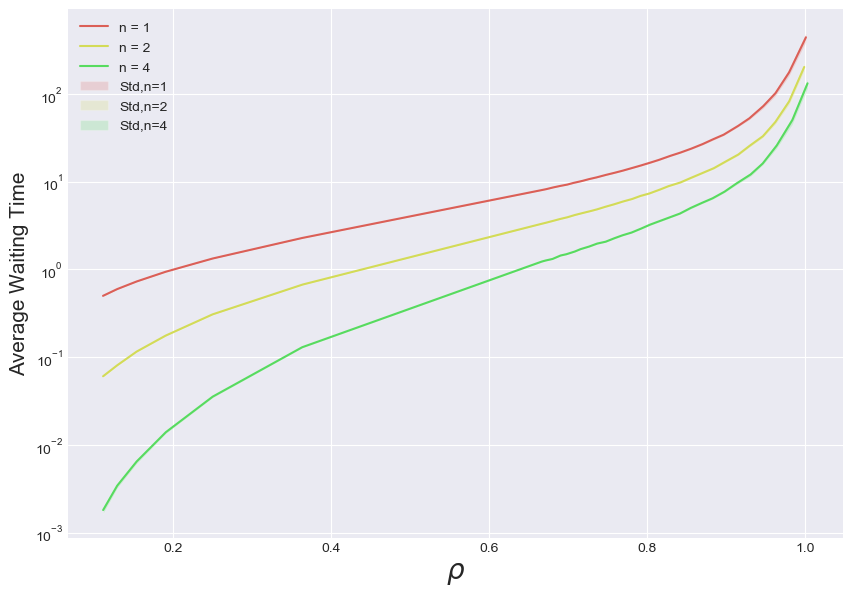

In [755]:
Dfill1 = []
Dfill2 = []

# Find the minimum and maximum values of the mean waiting time (to show error bar)
for j in range(len(servers)):
    Dh1list=[]
    Dh2list=[]
    for i in range(len(Dntot[0])):
        Dh1list.append(Dntot[j][i] + 1.96*Dnstdtot[j][i]/10)
        Dh2list.append(Dntot[j][i] - 1.96*Dnstdtot[j][i]/10)
    Dfill1.append(Dh1list)
    Dfill2.append(Dh2list)


# Plot the average waiting time as a function of the work load, rho
for i in range(len(servers)):
    plt.plot(Dnrhotot[i],Dntot[i],label='n = ' + str(servers[i]))
    plt.fill_between(Dnrhotot[i],Dfill1[i],Dfill2[i], alpha=0.2, edgecolor="white",label='Std,n='+ str(servers[i]))
    
plt.xlabel(r'$\rho$',size = 20)
plt.ylabel('Average Waiting Time',size = 15)
plt.yscale("log")
plt.legend()
plt.show()

# Long tail distribution

In [125]:
def lt_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS,SIM_TIME,SERVER):
    """Long tail distribution for service time"""
    
    LTarrivelist=[]
    LTwaitlist=[]
    LTservicelist=[]

    def source(env, number, interval, counter):
        """Source generates customers randomly"""
        for i in range(number):
            c = customer(env, 'Customer%02d' % i, counter)
            env.process(c)
            t = np.random.exponential(interval)
            yield env.timeout(t)


    def customer(env, name, counter):
        """Customer arrives, is served and leaves."""
        
        arrive = env.now
        LTarrivelist.append(arrive)
        bernoulli_para=bernoulli.rvs(0.75, size=1)
        if bernoulli_para== 1:
            tib = np.random.exponential(6)
        if bernoulli_para== 0:
            tib = np.random.exponential(14)
        
        with counter.request() as req:

            yield req 
            wait = env.now - arrive
            LTwaitlist.append(wait)

            yield env.timeout(tib)
            LTservicelist.append(tib)

    # Setup and start the simulation
    env = simpy.Environment()

    # Start processes and run
    counter = simpy.Resource(env, capacity=SERVER)
    env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
    env.run(until=SIM_TIME)
    
    return(LTwaitlist,LTservicelist,LTarrivelist)

# Longtail  Effect of $\rho$ and the average waiting time

In [198]:
servers = [1,2,4]
NEW_CUSTOMERS = 10000
SIM_TIME = 1000000

Lntot = []
Lnstdtot = []

Lnrhotot = []
Lnrhostdtot = []

simulations = 100

# Arrival rate

# Loop over servers (1,2,4)
for totservers in servers:
    Ln = []
    Lstdn = []
    
    Lnrho = []
    Lstdnrho = []
    
    # Loop over the arrival rate
    for interval in intervals:
        Lnrhoint = []
        Lnint = []
        Lstdnint = []
        
        # Calculate for multiple simulations
        for sim in range(simulations):
            Lnwaitlist,Lnservicelist,Lnarrivelist = det_queuing(NEW_CUSTOMERS,interval / totservers,SIM_TIME,totservers)
            
            # Save the average waiting time and the work load, rho
            Lnint.append(np.mean(Lnwaitlist))
            Lnrhoint.append((1 / (Lnarrivelist[-1] / NEW_CUSTOMERS)) / (totservers / np.mean(Lnservicelist)))
           
            
        Ln.append(np.mean(Lnint))
        Lstdn.append(np.std(Lnint))
        Lnrho.append(np.mean(Lnrhoint))
#         stdnrho.append(np.std(nrhoint))
        
    Lntot.append((Ln))
    Lnstdtot.append(Lstdn)
    
    Lnrhotot.append((Lnrho))
#     nrhostdtot.append(stdnrho)


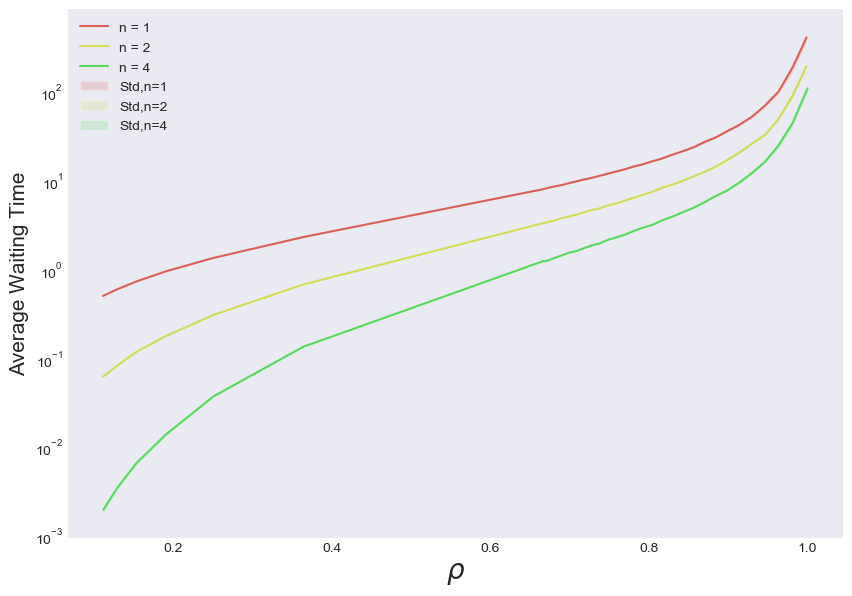

In [756]:
Lfill1 = []
Lfill2 = []

# Find the minimum and maximum values of the mean waiting time (to show error bar)
for j in range(len(servers)):
    Lh1list=[]
    Lh2list=[]
    for i in range(len(Lntot[0])):
        Lh1list.append(Lntot[j][i] + 1.96*Lnstdtot[j][i]/10)
        Lh2list.append(Lntot[j][i] - 1.96*Lnstdtot[j][i]/10)
    Lfill1.append(Lh1list)
    Lfill2.append(Lh2list)


# Plot the average waiting time as a function of the work load, rho
for i in range(len(servers)):
    plt.plot(Lnrhotot[i],Lntot[i],label='n = ' + str(servers[i]))
    plt.fill_between(Lnrhotot[i],Lfill1[i],Lfill2[i], alpha=0.2, edgecolor="white",label='Std,n='+ str(servers[i]))   
plt.xlabel(r'$\rho$',size = 20)
plt.yscale("log")
plt.grid()
# plt.yscale("symlog")
plt.ylabel('Average Waiting Time',size = 15)
plt.legend()
plt.show()

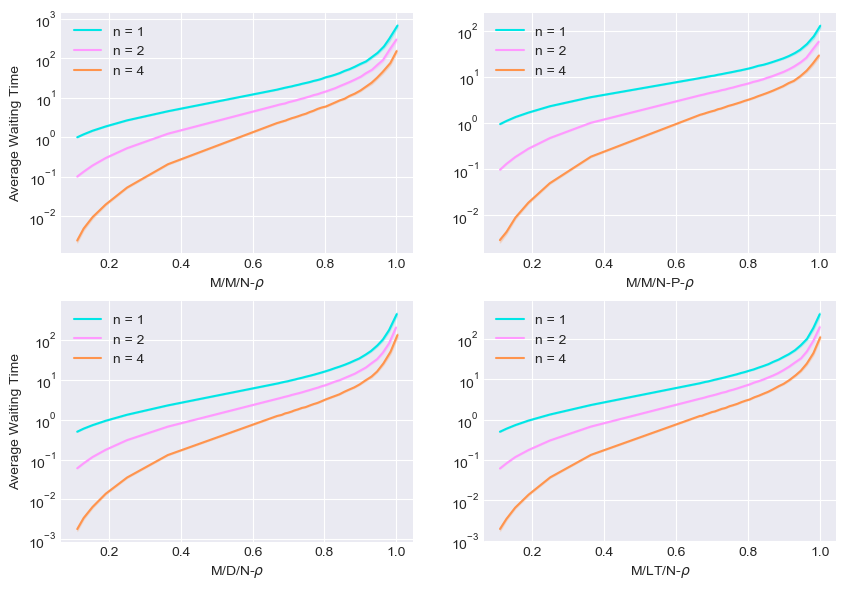

In [757]:

plt.rcParams['figure.figsize'] = (10.0, 7.0) 
plt.subplot(2,2,1)
plt.style.use('seaborn-darkgrid')
colorlist=['#00e6e6','#ff99ff','#ff944d']

for i in range(len(servers)):
    plt.plot(nrhotot[i],ntot[i],color=colorlist[i],label='n = ' + str(servers[i]))
    plt.fill_between(nrhotot[i],nfill2[i],nfill1[i],color=colorlist[i], alpha=0.2, edgecolor="white")
plt.xlabel(r'M/M/N-$\rho$')
plt.ylabel('Average Waiting Time')
plt.yscale("log")

# plt.xlim(0.8,1.05)
plt.legend(loc=2)
plt.subplot(2,2,2)
for i in range(len(servers)):
    plt.plot(pnrhotot[i],pntot[i],color=colorlist[i],label='n = ' + str(servers[i]))
    plt.fill_between(pnrhotot[i],pfill1[i],pfill2[i], color=colorlist[i],alpha=0.2, edgecolor="white")
    
plt.xlabel(r'M/M/N-P-$\rho$')
# plt.ylabel('Average Waiting Time')

plt.yscale("log")
# plt.xlim(0.8,1.05)
plt.legend(loc=2)

plt.subplot(2,2,3)
for i in range(len(servers)):
    plt.plot(Dnrhotot[i],Dntot[i],color=colorlist[i],label='n = ' + str(servers[i]))
    plt.fill_between(Dnrhotot[i],Dfill1[i],Dfill2[i], color=colorlist[i],alpha=0.2, edgecolor="white")
plt.xlabel(r'M/D/N-$\rho$')
plt.ylabel('Average Waiting Time')

plt.yscale("log")
# plt.xlim(0.8,1.05)
plt.legend(loc=2)
plt.subplot(2,2,4)
for i in range(len(servers)):
    plt.plot(Lnrhotot[i],Lntot[i],color=colorlist[i],label='n = ' + str(servers[i]))
    plt.fill_between(Lnrhotot[i],Lfill1[i],Lfill2[i], color=colorlist[i],alpha=0.2, edgecolor="white")   
plt.xlabel(r'M/LT/N-$\rho$')
# plt.ylabel('Average Waiting Time')
plt.yscale("log")
# plt.xlim(0.8,1.05)
plt.legend(loc=2)
plt.savefig('fourmethodchaningrho.jpg',bbox_inches = 'tight')
plt.show()

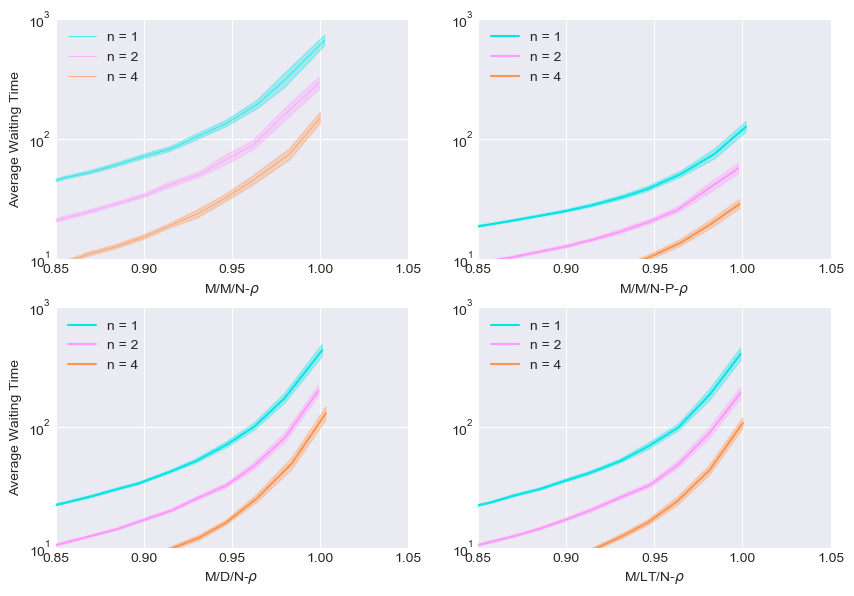

In [764]:
plt.rcParams['figure.figsize'] = (10.0, 7) 
colorlist=['#00e6e6','#ff99ff','#ff944d']
plt.subplot(2,2,1)
for i in range(len(servers)):
    plt.plot(nrhotot[i],ntot[i],color=colorlist[i],label='n = ' + str(servers[i]),linewidth=0.5)
    plt.fill_between(nrhotot[i],nfill2[i],nfill1[i],color=colorlist[i], alpha=0.3, edgecolor="white")
plt.xlabel(r'M/M/N-$\rho$')
plt.ylabel('Average Waiting Time')
plt.yscale("log")
plt.xlim(0.85,1.05)
plt.ylim(10,1000)
plt.legend(loc=2)


plt.subplot(2,2,2)
for i in range(len(servers)):
    plt.plot(pnrhotot[i],pntot[i],color=colorlist[i],label='n = ' + str(servers[i]))
    plt.fill_between(pnrhotot[i],pfill1[i],pfill2[i], color=colorlist[i],alpha=0.3, edgecolor="white")
    
plt.xlabel(r'M/M/N-P-$\rho$')
plt.yscale("log")
# plt.ylabel('Average Waiting Time')
plt.xlim(0.85,1.05)
plt.ylim(10,1000)
plt.legend(loc=2)

plt.subplot(2,2,3)
for i in range(len(servers)):
    plt.plot(Dnrhotot[i],Dntot[i],color=colorlist[i],label='n = ' + str(servers[i]))
    plt.fill_between(Dnrhotot[i],Dfill1[i],Dfill2[i],color=colorlist[i], alpha=0.3, edgecolor="white")
plt.xlabel(r'M/D/N-$\rho$')
plt.ylabel('Average Waiting Time')
plt.yscale("log")
plt.xlim(0.85,1.05)
plt.ylim(10,1000)
plt.legend(loc=2)
plt.subplot(2,2,4)

for i in range(len(servers)):
    plt.plot(Lnrhotot[i],Lntot[i],color=colorlist[i],label='n = ' + str(servers[i]))
    plt.fill_between(Lnrhotot[i],Lfill1[i],Lfill2[i],color=colorlist[i], alpha=0.3, edgecolor="white")   
plt.xlabel(r'M/LT/N-$\rho$')
# plt.ylabel('Average Waiting Time')

plt.xlim(0.85,1.05)
plt.ylim(10,1000)
plt.legend(loc=2)
plt.yscale("log")
plt.savefig('zoomfourmethodchaningrho.jpg',bbox_inches = 'tight')
plt.show()

# Comparing all methods for n=1

# Compare all the method for n=1,2,4

In [647]:
servers = [1,2,4]
INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds
NEW_CUSTOMERS = 1000
SIM_TIME = 1000000

n1tot = []
priotot = []
dettot = []
lttot = []

stdntot = []
stdpriotot = []
stddettot = []
stdlttot = []

n1rhotot = []
priorhotot = []
detrhotot = []
ltrhotot = []

simulations = 100

for totservers in servers:
    n = []
    prio = []
    det = []
    lt = []
    
    nrho = []
    priorho = []
    detrho = []
    ltrho = []
    
    for sim in range(simulations):
        
        n1waitlist,n1servicelist,n1arrivelist = n_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS / totservers,SIM_TIME,totservers)
        priowaitlist,prioservicelist,prioarrivelist = prio_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS / totservers,SIM_TIME,totservers)
        detwaitlist,detservicelist,detarrivelist = det_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS / totservers,SIM_TIME,totservers)
        ltwaitlist,ltservicelist,ltarrivelist = lt_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS / totservers,SIM_TIME,totservers)
        
        # Save the waiting time from each simulation
        n.append(np.mean(n1waitlist))
        prio.append(np.mean(priowaitlist))
        det.append(np.mean(detwaitlist))
        lt.append(np.mean(ltwaitlist))
        
        # Save the rho from each simulation
        nrho.append((1 / (n1arrivelist[-1] / NEW_CUSTOMERS)) / (totservers / np.mean(n1servicelist)))
        priorho.append((1 / (prioarrivelist[-1] / NEW_CUSTOMERS)) / (totservers / np.mean(prioservicelist)))
        detrho.append((1 / (detarrivelist[-1] / NEW_CUSTOMERS)) / (totservers / np.mean(detservicelist)))
        ltrho.append((1 / (ltarrivelist[-1] / NEW_CUSTOMERS)) / (totservers / np.mean(ltservicelist)))
        
    # Get the mean waiting time for each method over all simulations
    n1tot.append(np.mean(n))
    priotot.append(np.mean(prio))
    dettot.append(np.mean(det))
    lttot.append(np.mean(lt))
    
    # Get the std of this waiting time
    stdntot.append(np.std(n))
    stdpriotot.append(np.std(prio))
    stddettot.append(np.std(det))
    stdlttot.append(np.std(lt))
    
    
    # Get the mean rho for each method over all simulations
    n1rhotot.append(np.mean(nrho))
    priorhotot.append(np.mean(priorho))
    detrhotot.append(np.mean(detrho))
    ltrhotot.append(np.mean(ltrho))


Rho for all methods and n: [0.8072387926628071, 0.800810546675775, 0.8052572529771514] [0.8031459875333543, 0.8046891667276996, 0.8019037896735264] [0.8069036014713946, 0.799740867450001, 0.806778415717095] [0.8009430138753837, 0.8014252221443747, 0.8115015920365231]


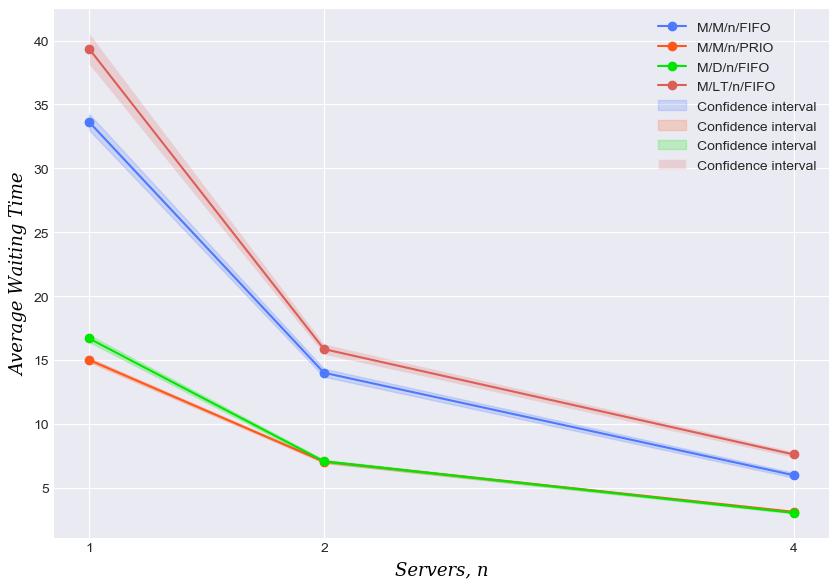

In [760]:
def fill_values(total,std):
    fill1 = []
    fill2 = []

    # Find the minimum and maximum values of the mean waiting time (to show error bar)
    for i in range(len(total)):
        fill1.append(total[i] + 1.96*std[i]/np.sqrt(1000))
        fill2.append(total[i] - 1.96*std[i]/np.sqrt(1000))
    
    return fill1, fill2

print('Rho for all methods and n:',n1rhotot,priorhotot,detrhotot,ltrhotot)
plt.plot(servers,n1tot,'o-',color='#4d79ff',label='M/M/n/FIFO')
fill1,fill2 = fill_values(n1tot,stdntot)
plt.fill_between(servers,fill1,fill2, alpha=0.2, color='#4d79ff',edgecolor="white",label='Confidence interval')

plt.plot(servers,priotot,'o-',color='#ff571a',label='M/M/n/PRIO')
fill1,fill2 = fill_values(priotot,stdpriotot)
plt.fill_between(servers,fill1,fill2, alpha=0.2, color='#ff571a',edgecolor="white",label='Confidence interval')

plt.plot(servers,dettot,'o-',color='#00e600',label='M/D/n/FIFO')
fill1,fill2 = fill_values(dettot,stddettot)
plt.fill_between(servers,fill1,fill2, alpha=0.2, color='#00e600',edgecolor="white",label='Confidence interval')

plt.plot(servers,lttot,'o-',label='M/LT/n/FIFO')
fill1,fill2 = fill_values(lttot,stdlttot)
plt.fill_between(servers,fill1,fill2, alpha=0.2, edgecolor="white",label='Confidence interval')

plt.xlabel('Servers, n',font)
plt.ylabel('Average Waiting Time',font)
plt.xticks([1,2,4])
plt.legend()
plt.savefig('allmethods_servers.jpg',bbox_inches = 'tight')
plt.show()

# Statistical+Normal test

In [730]:
totalservers = 1
INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds
NEW_CUSTOMERS = 10000
SIM_TIME = 100000000


simulations = 100


n111 = []
prio111 = []
det111 = []
lt111 = []
    
    
for sim in range(simulations):

    n1waitlist,n1servicelist,n1arrivelist = n_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS / totservers,SIM_TIME,totservers)
    priowaitlist,prioservicelist,prioarrivelist = prio_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS / totservers,SIM_TIME,totservers)
    detwaitlist,detservicelist,detarrivelist = det_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS / totservers,SIM_TIME,totservers)
    ltwaitlist,ltservicelist,ltarrivelist = lt_queuing(NEW_CUSTOMERS,INTERVAL_CUSTOMERS / totservers,SIM_TIME,totservers)

    # Save the waiting time from each simulation
    n111.append(np.mean(n1waitlist))
    prio111.append(np.mean(priowaitlist))
    det111.append(np.mean(detwaitlist))
    lt111.append(np.mean(ltwaitlist))
        

    # Get the mean waiting time for each method over all simulations

In [731]:
a1=scipy.stats.shapiro(n111)
a2=scipy.stats.shapiro(prio111)
a3=scipy.stats.shapiro(det111)
a4=scipy.stats.shapiro(lt111)
print("P value of norma test for M/M/N:",a1[1])
print("P value of norma test for M/M/N-P:",a2[1])
print("P value of norma test for M/D/N:",a3[1])
print("P value of norma test for M/LT/N:",a4[1])

P value of norma test for M/M/N: 0.3110905885696411
P value of norma test for M/M/N-P: 0.490559846162796
P value of norma test for M/D/N: 0.3952905833721161
P value of norma test for M/LT/N: 0.02235354296863079


In [740]:
nmu=np.mean(n111)
nsigma=np.std(n111)
priomu=np.mean(prio111)
priosigema=np.std(prio111)
detmu=np.mean(det111)
detsigema=np.std(det111)
ltmu=np.mean(lt111)
ltsigema=np.std(lt111)


normal1=np.linspace(nmu - 3*nsigma, nmu + 3*nsigma, 100)
normal11=np.linspace(nmu - 1.96*nsigma, nmu + 1.96*nsigma, 100)
ny1=scipy.stats.norm.pdf(normal11,nmu, nsigma)

normal2=np.linspace(priomu - 3*priosigema, priomu + 3*priosigema, 100)
normal22=np.linspace(priomu - 1.96*priosigema, priomu + 1.96*priosigema, 100)
ny2=scipy.stats.norm.pdf(normal22,priomu, priosigema)

normal3=np.linspace(detmu - 3*detsigema, detmu + 3*detsigema, 100)
normal33=np.linspace(detmu - 1.96*detsigema, detmu + 1.96*detsigema, 100)
ny3=scipy.stats.norm.pdf(normal33,detmu, detsigema)

normal4=np.linspace(ltmu - 3*ltsigema, ltmu + 3*ltsigema, 100)
normal44=np.linspace(ltmu - 1.96*ltsigema, ltmu + 1.96*ltsigema, 100)
ny4=scipy.stats.norm.pdf(normal44,ltmu, ltsigema)


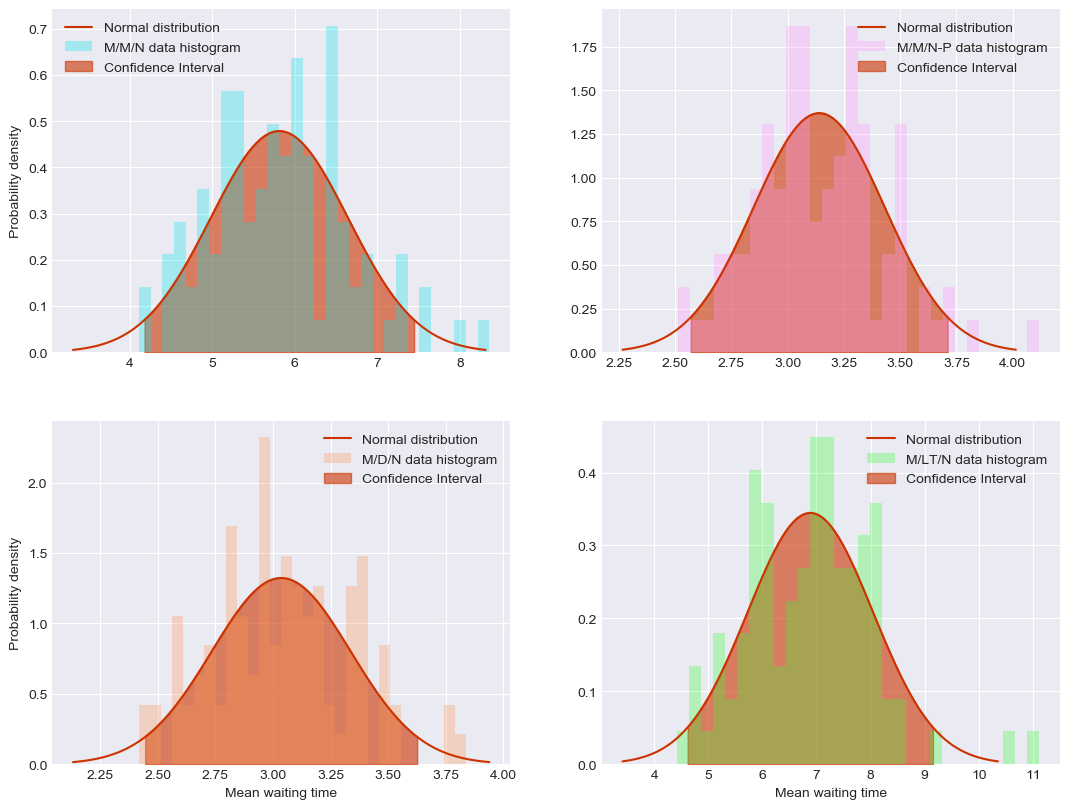

In [741]:
plt.rcParams['figure.figsize'] = (13.0, 10) 
plt.subplot(2,2,1)
num_bins=30
n1, bins, patches = plt.hist(n111, num_bins,density=1, facecolor='#00e6e6', alpha=0.3,label='M/M/N data histogram')
ny = scipy.stats.norm.pdf(normal1,nmu, nsigma)
plt.plot(normal1, ny, '#cc3300',label='Normal distribution')

plt.fill_between(normal11,0, ny1,alpha=0.6, color='#cc3300',edgecolor="white",label='Confidence Interval')

plt.ylabel('Probability density')
plt.legend()
plt.subplot(2,2,2)
n2, bins, patches = plt.hist(prio111, num_bins,density=1, facecolor='#ff99ff', alpha=0.3,label='M/M/N-P data histogram')
proy = scipy.stats.norm.pdf(normal2, priomu, priosigema)
plt.fill_between(normal22,0, ny2,alpha=0.6, color='#cc3300',edgecolor="white",label='Confidence Interval')
plt.plot(normal2, proy, '#cc3300',label='Normal distribution')
plt.legend()

plt.subplot(2,2,3)
n3, bins, patches = plt.hist(det111, num_bins,density=1, facecolor='#ff944d', alpha=0.3,label='M/D/N data histogram')
dety = scipy.stats.norm.pdf(normal3, detmu, detsigema)
plt.plot(normal3, dety, '#cc3300',label='Normal distribution')
plt.fill_between(normal33,0, ny3,alpha=0.6, color='#cc3300',edgecolor="white",label='Confidence Interval')
plt.ylabel('Probability density')
plt.xlabel('Mean waiting time')
plt.legend()


plt.subplot(2,2,4)
n4, bins, patches = plt.hist(lt111, num_bins,density=1, facecolor='#33ff33', alpha=0.3,label='M/LT/N data histogram')
ltty = scipy.stats.norm.pdf(normal4, ltmu, ltsigema)
plt.plot(normal4, ltty, '#cc3300',label='Normal distribution')
plt.fill_between(normal44,0, ny4,alpha=0.6, color='#cc3300',edgecolor="white",label='Confidence Interval')
plt.xlabel('Mean waiting time')
plt.legend()
plt.savefig('Normal_distr.jpg',bbox_inches = 'tight')
plt.show()

In [655]:
font = {'family': 'serif',
         'style': 'italic',
         'weight': 'normal',
        'color':  'black', 
        'size': 13,
        }